# 2. Boston 주택 가격 예측 모델


## 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
import numpy as np
from sklearn.preprocessing import StandardScaler


# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.

mean = train_data.mean(axis=0)
train_data -= mean


# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
feature_stds = np.std(train_data, axis=0)
train_data /= feature_stds


# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_scaled = scaler.transform(train_data)
test_data_scaled = scaler.transform(test_data)


# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data -= mean
test_data /= feature_stds


## 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## 모델 학습

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.

history = model.fit(train_data, train_labels, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
404/404 [==============================] - 3s 4ms/step - loss: 139.6909 - mae: 8.2339
Epoch 2/100
404/404 [==============================] - 2s 5ms/step - loss: 23.1183 - mae: 3.2047
Epoch 3/100
404/404 [==============================] - 2s 4ms/step - loss: 17.4180 - mae: 2.7473
Epoch 4/100
404/404 [==============================] - 3s 8ms/step - loss: 15.1359 - mae: 2.5707
Epoch 5/100
404/404 [==============================] - 3s 6ms/step - loss: 14.1633 - mae: 2.5264
Epoch 6/100
404/404 [==============================] - 2s 5ms/step - loss: 12.1607 - mae: 2.3882
Epoch 7/100
404/404 [==============================] - 3s 7ms/step - loss: 12.3567 - mae: 2.3335
Epoch 8/100
404/404 [==============================] - 2s 6ms/step - loss: 11.7016 - mae: 2.2887
Epoch 9/100
404/404 [==============================] - 2s 6ms/step - loss: 10.9087 - mae: 2.2333
Epoch 10/100
404/404 [==============================] - 4s 9ms/step - loss: 10.8445 - mae: 2.2739
Epoch 11/100
404/404 [======

<ipython-input-6-374891ae1d2f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


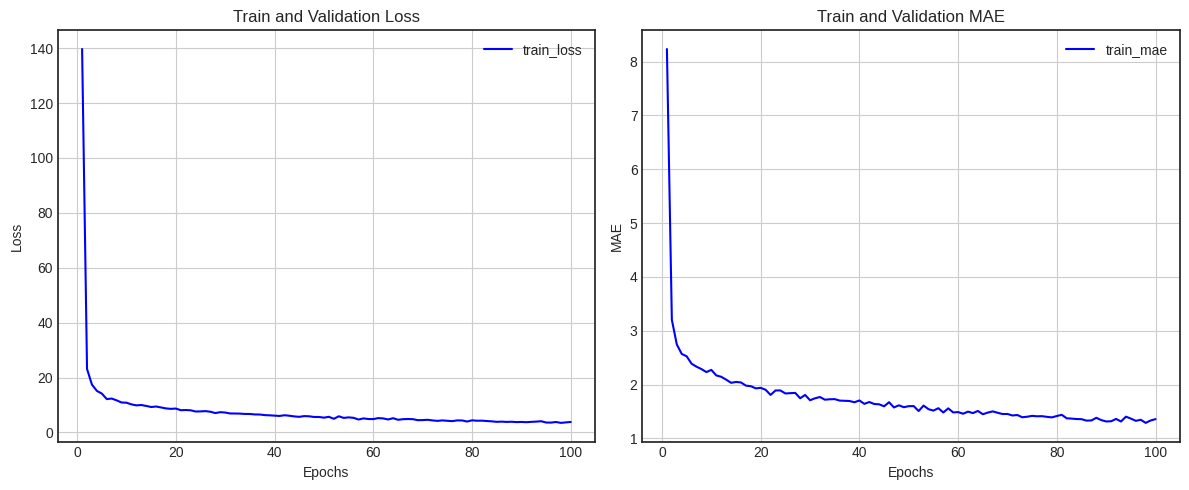

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict.get('val_loss', None)  # val_loss 키가 없는 경우 None을 반환

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
if val_loss is not None:
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict.get('val_mae', None)  # val_mae 키가 없는 경우 None을 반환

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
if val_mae is not None:
    ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

## 모델 평가 및 예측

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.

test_loss, test_mae = model.evaluate(test_data, test_labels)

print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

4/4 [==============================] - 0s 4ms/step - loss: 11.8062 - mae: 2.2630
Test Loss: 11.806241989135742
Test MAE: 2.263017177581787


# 3. Reuters 딥러닝 모델

 ## 데이터 로드 및 전처리


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

# 데이터 전처리
num_classes = max(train_labels) + 1

# 훈련 데이터셋과 검증 데이터셋으로 분리 (25%를 검증 데이터셋으로 설정)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 [==============================] - 1s 0us/step
6736
2246
2246
46


In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras import utils

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        for index in sequence:
            if index < dim:
                results[i, index] = 1.
    return results

# 원-핫 인코딩 적용
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]


# 레이블 데이터들을 범주형 형태로 변환
num_classes = max(train_labels) + 1
y_train = utils.to_categorical(train_labels, num_classes)
y_val = utils.to_categorical(val_labels, num_classes)
y_test = utils.to_categorical(test_labels, num_classes)


## 모델 구성 및 컴파일

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640064    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)               

## 모델 학습

In [13]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
# ModelCheckpoint 콜백 생성
checkpoint = callbacks.ModelCheckpoint('model_checkpoint.h5', monitor='val_loss', save_best_only=True)

# EarlyStopping 콜백 생성
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 모델 훈련 시 콜백 지정
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/20
211/211 [==============================] - 6s 20ms/step - loss: 2.3458 - accuracy: 0.4988 - val_loss: 1.5422 - val_accuracy: 0.6821
Epoch 2/20
211/211 [==============================] - 3s 16ms/step - loss: 1.4714 - accuracy: 0.6786 - val_loss: 1.1908 - val_accuracy: 0.7520
Epoch 3/20
211/211 [==============================] - 4s 17ms/step - loss: 1.2222 - accuracy: 0.7248 - val_loss: 1.1271 - val_accuracy: 0.7591
Epoch 4/20
211/211 [==============================] - 5s 22ms/step - loss: 1.0497 - accuracy: 0.7644 - val_loss: 1.0858 - val_accuracy: 0.7671
Epoch 5/20
211/211 [==============================] - 4s 17ms/step - loss: 0.9640 - accuracy: 0.7804 - val_loss: 1.0342 - val_accuracy: 0.7890
Epoch 6/20
211/211 [==============================] - 3s 14ms/step - loss: 0.8617 - accuracy: 0.7988 - val_loss: 1.0229 - val_accuracy: 0.7894
Epoch 7/20
211/211 [==============================] - 6s 28ms/step - loss: 0.7884 - accuracy: 0.8137 - val_loss: 1.0067 - val_accuracy: 0.7925

<ipython-input-14-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


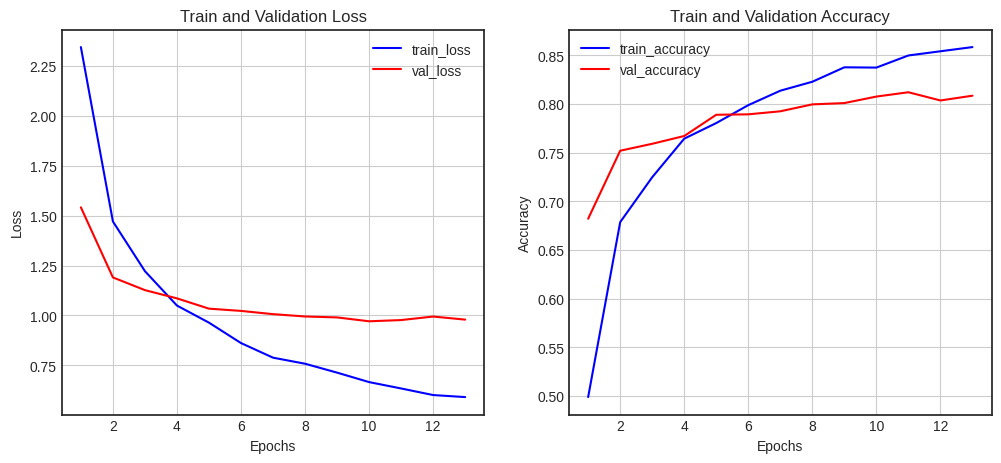

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가 및 예측


In [15]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

71/71 [==============================] - 0s 4ms/step - loss: 1.0786 - accuracy: 0.7823
Test Loss: 1.0786309242248535
Test Accuracy: 0.7822796106338501


# 4. CIFAR10 딥러닝 모델
 ## 데이터 로드 및 전처리

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

# 데이터셋을 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 6s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-19-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


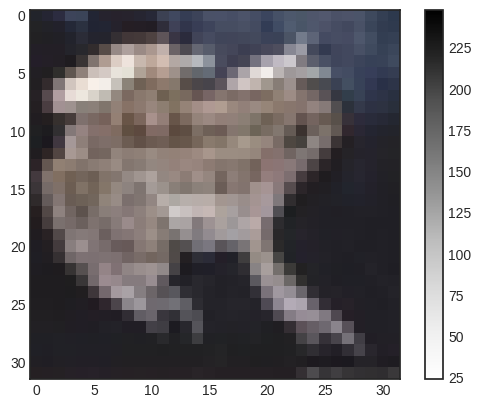

In [19]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [21]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
import numpy as np

x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 32 * 32 * 3))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 32 * 32 * 3))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [22]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성 및 컴파일

In [23]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

from tensorflow.keras.layers import BatchNormalization, Dropout

# 이미지를 분류하는 딥러닝 모델을 구성
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일 모델
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               786688    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)              

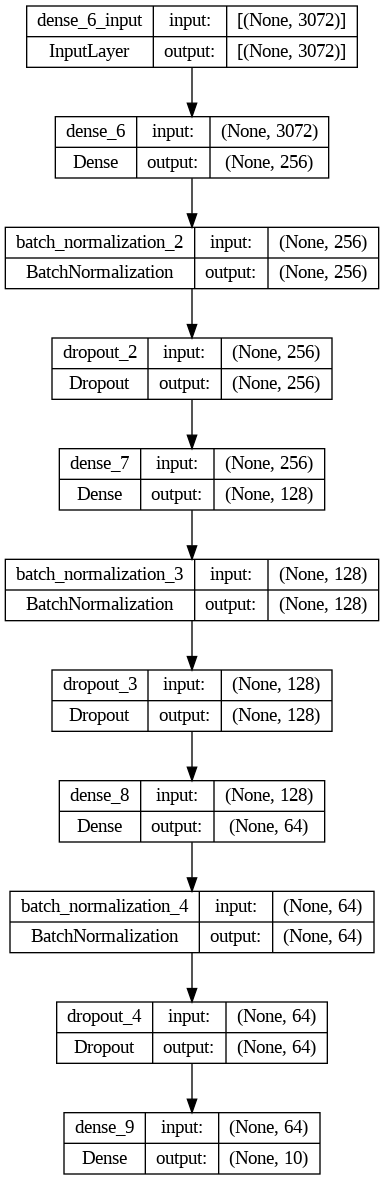

In [25]:
utils.plot_model(model, show_shapes=True)

## 모델 학습

In [26]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Create the model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = ModelCheckpoint(filepath='checkpoint-{epoch:02d}-{val_loss:.5f}.h5', monitor='val_loss', save_best_only=True, save_weights_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=128, callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 2.3751 - accuracy: 0.2112 - val_loss: 1.8766 - val_accuracy: 0.3202
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 1.9740 - accuracy: 0.2803 - val_loss: 1.8540 - val_accuracy: 0.3131
Epoch 3/100
313/313 [==============================] - 9s 30ms/step - loss: 1.8996 - accuracy: 0.3090 - val_loss: 1.8182 - val_accuracy: 0.3348
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 1.8635 - accuracy: 0.3264 - val_loss: 1.8099 - val_accuracy: 0.3384
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 1.8473 - accuracy: 0.3358 - val_loss: 1.7324 - val_accuracy: 0.3730
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 1.8315 - accuracy: 0.3416 - val_loss: 1.7900 - val_accuracy: 0.3461
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 1.8360 - accuracy: 0.3389 - val_loss: 1.7764 - val_accurac

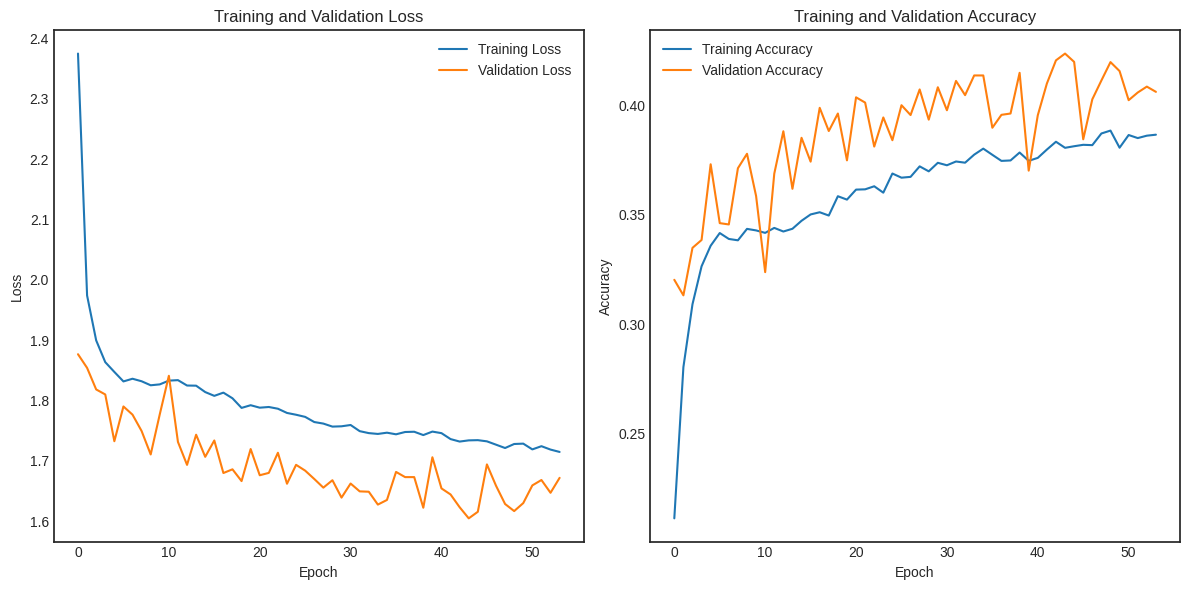

In [27]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 모델 평가 및 예측

In [28]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.5964 - accuracy: 0.4223


[1.5963877439498901, 0.4223000109195709]